### Project Proposal to Predict Credit Card Approval

This Capstone project has been been done to predict the Good and Bad Customers for Credit Cards.

#### Q1 Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

As Credit score cards are a common risk control method in the financial industry, the machine Learning model helps to predict the probability of future defaults and credit card borrowings
It helps the bank to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

#### Q2 How is it going to impact the banking sector? 

Credit score cards are a common risk control method in the financial industry.The Machine learning model will be of huge help in preventing defaulters, preventing Bank from Bankrupcy as the bank is able to decide whether to issue a credit card to the applicant or not. Credit scores can objectively quantify the magnitude of risk.

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

#### Q3 If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. 

At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. 

It will help to  provide customers and regulators with a reason for rejection or acceptance.

### Exploratory Data analysis 


#### Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

#### Reading Data from Excel File

In [2]:
df_creditcard = pd.read_csv(r'C:\Users\armaity\Desktop\Support Tools\power bi\Python projects practice\Portfolio Projects\Machine learning Model\Credit_card.csv')

In [3]:
df_label = pd.read_csv(r'C:\Users\armaity\Desktop\Support Tools\power bi\Python projects practice\Portfolio Projects\Machine learning Model\Credit_card_label.csv')


In [4]:
df_creditcard.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
df_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [7]:
# Merging the DataSets
df_merged = pd.merge(df_creditcard,df_label, on='Ind_ID',how = 'inner')
df_merged.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [10]:
#Understanding the Data
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<AxesSubplot:>

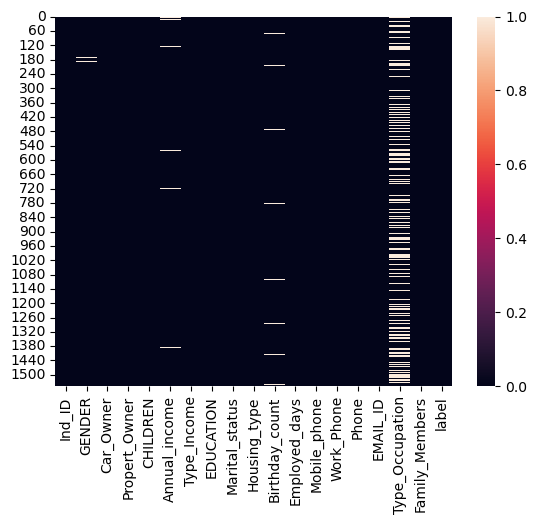

In [11]:
# to ckeck for null values
sns.heatmap(df_merged.isnull())

In [13]:
# to check for Null values
df_merged.isnull().sum()
# we can see that Occupation column has the most null values with some in Annual income,Gender ,birthday_count

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [14]:
# to cleck whether we have any duplicate entries in our dataset
len(df_merged['Ind_ID']) - len(df_merged['Ind_ID'].unique())

0

#### Fill the missing date in all the colums

In [16]:
newdf_merged = df_merged.copy()
mean_value = newdf_merged['Annual_income'].mean()
mean_value

191399.3262295082

In [17]:
#filling the missing data in the annual income column with the mean value of annual income
newdf_merged['Annual_income'].fillna(value=mean_value,inplace = True)

In [18]:
newdf_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [19]:
#fill with the most common occurance in type occupation,birthday count and gender for NAN Values
df_clean = newdf_merged.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,Laborers,2,1


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [21]:
#Basic data analysis to understand the data

In [22]:
#Converting the number of days format in DAYS_BIRTH and DAYS_EMPLOYED to number of years
# Using pandas timedelta type which eases the conversion to datetime format and years calculation
df_clean['AGE'] = np.ceil(pd.to_timedelta(df_clean['Birthday_count'], unit='D').dt.days / -365.25)

In [23]:
# values greater than zero means that the applicant doesn't work
df_clean.loc[(df_clean['Employed_days'] > 0), 'Employed_days'] = 0
df_clean['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(df_clean['Employed_days'], unit='D').dt.days / -365.25)

In [24]:
df_clean.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,0,1,0,0,0,Laborers,2,1,52.0,-0.0
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,38.0,2.0
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,38.0,2.0
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,38.0,2.0
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,38.0,2.0


In [25]:
#Renaming columns and dropping redundant features
df_clean = df_clean.drop(columns = ['Birthday_count','Employed_days'])

In [26]:
df_clean.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,52.0,-0.0
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0


In [27]:
newdfclean = df_clean.copy()


In [28]:
newdfclean.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,52.0,-0.0
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0


<Figure size 1000x1000 with 0 Axes>

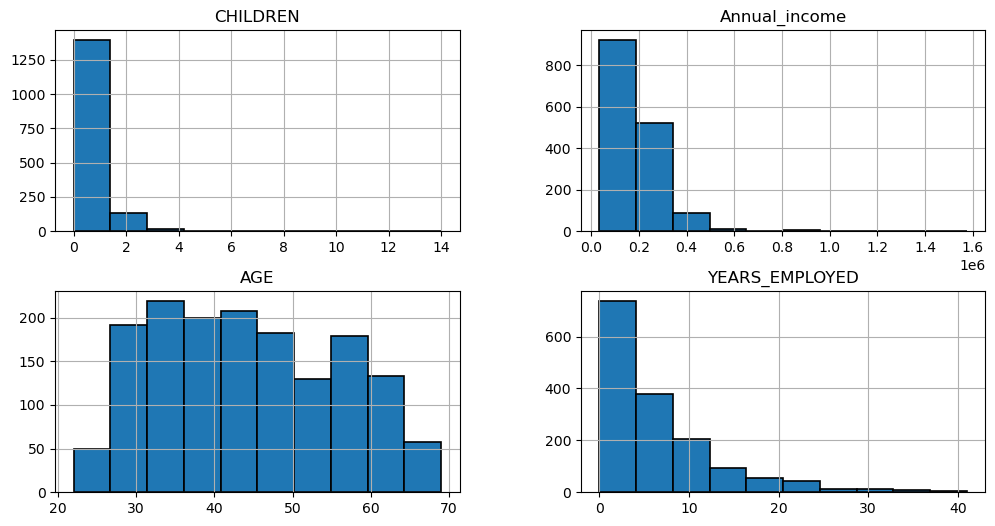

In [29]:
plt.figure(figsize=(10,10))

cols_to_plot = ["CHILDREN","Annual_income","AGE","YEARS_EMPLOYED"]
newdfclean[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

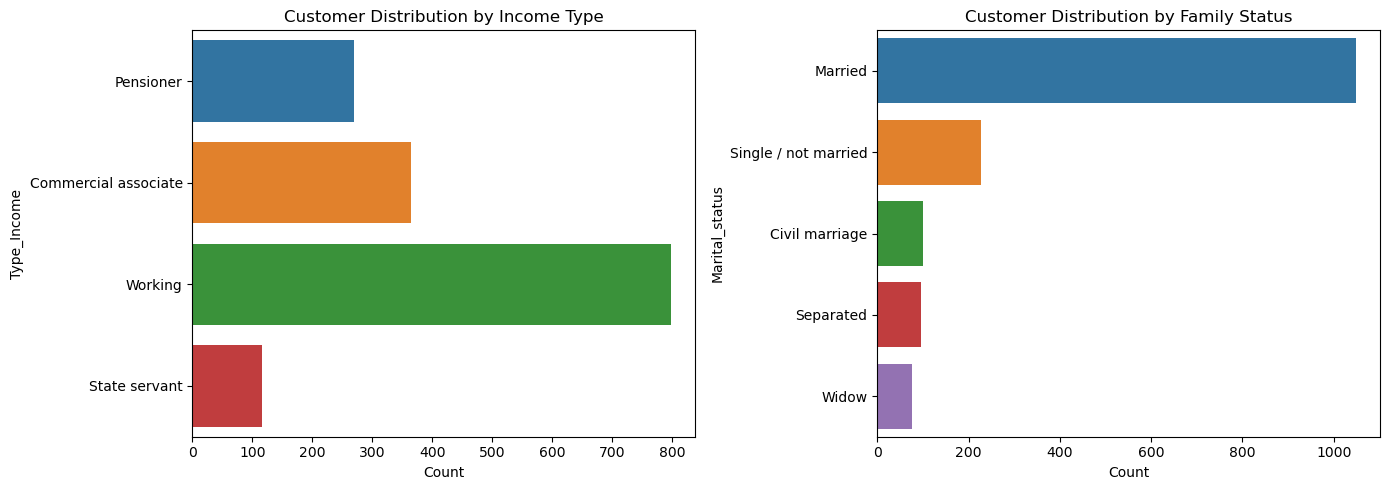

In [30]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=newdfclean.Type_Income,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=newdfclean.Marital_status,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

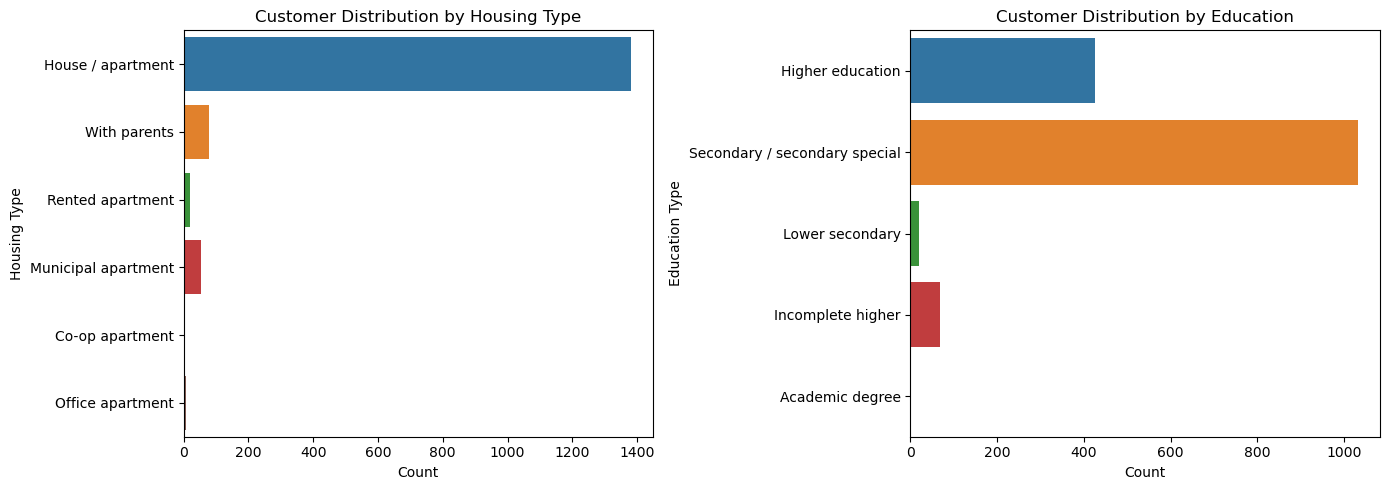

In [31]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=newdfclean.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=newdfclean.EDUCATION, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

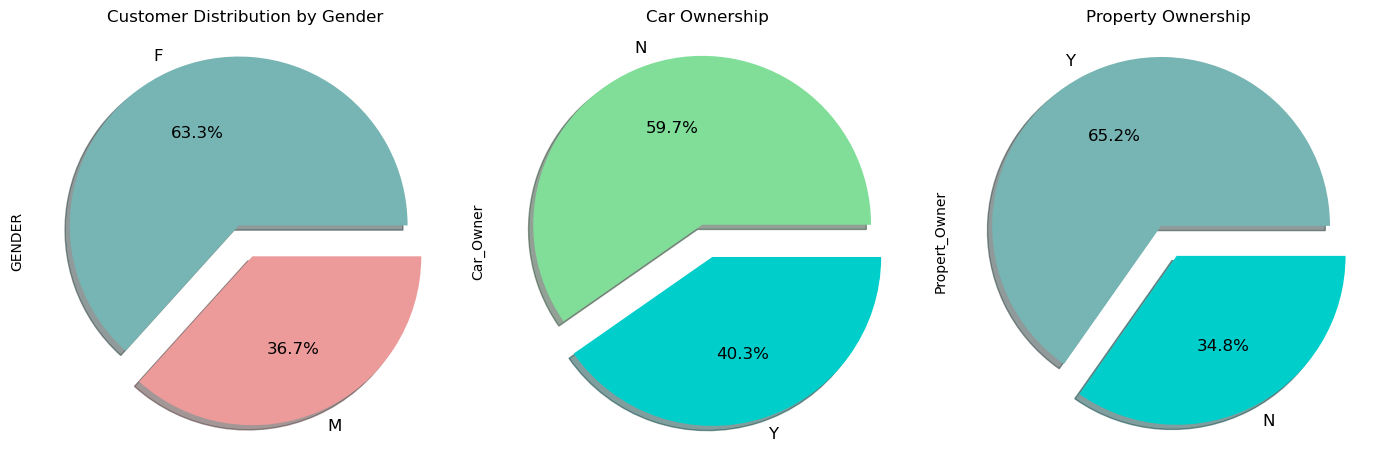

In [32]:
fig, axes = plt.subplots(1,3)

g1= newdfclean['GENDER'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= newdfclean['Car_Owner'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= newdfclean['Propert_Owner'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B5B3","#00CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Property Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

#### Feature Engineering

In [40]:
newdfclean.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,52.0,-0.0
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,38.0,2.0


In [41]:
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in newdfclean:
    if newdfclean[x].dtypes=='object':
        newdfclean[x] = le.fit_transform(newdfclean[x])

In [42]:
newdfclean.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,1,1,1,0,180000.00000,1,1,1,1,1,0,0,0,8,2,1,52.0,-0.0
1,5009744,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
2,5009746,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
3,5009749,0,1,0,0,191399.32623,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
4,5009752,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0


In [43]:
# We will look at numeric columns to see if there is anything that needs to be changed.
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [44]:
other_numerical_cols = ["Annual_income","AGE","YEARS_EMPLOYED","Family_Members"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members"))

fig.add_trace(go.Box(x=newdfclean.Annual_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=newdfclean.AGE, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=newdfclean.YEARS_EMPLOYED, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=newdfclean.Family_Members, name="Family Members Count", boxmean=True),row=2, col=2)

fig.show()

In [45]:
#As we can see we have outliers in the numerical columns
#We will remove outliers using Z Scores

In [93]:
def calculate_z_scores(df, cols):
    for col in cols:
        df[col+"_z_score"] = (df[col] - df[col].mean())/df[col].std()
    return df

df_2 = calculate_z_scores(df = newdfclean, cols = ["Annual_income","YEARS_EMPLOYED","Family_Members"])

#removing outliers
filter_2 = df_2.Family_Members_z_score.abs() <= 3.5
filter_3 = df_2.YEARS_EMPLOYED_z_score.abs() <= 3.5
filter_4 = df_2.Annual_income_z_score.abs() <= 3.5

customer_apps = df_2[filter_2 & filter_3 & filter_4]






In [96]:
customer_apps.drop(columns= ["Family_Members_z_score","YEARS_EMPLOYED_z_score","Annual_income_z_score"],inplace=True)

In [97]:
customer_apps

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE,YEARS_EMPLOYED
0,5008827,1,1,1,0,180000.00000,1,1,1,1,1,0,0,0,8,2,1,52.0,-0.0
1,5009744,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
2,5009746,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
3,5009749,0,1,0,0,191399.32623,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
4,5009752,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,1,38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,191399.32623,0,1,1,1,1,0,0,0,10,2,0,33.0,6.0
1544,5023655,0,0,0,0,225000.00000,0,2,3,1,1,0,0,0,0,1,0,29.0,4.0
1545,5115992,1,1,1,2,180000.00000,3,1,1,1,1,0,0,0,10,4,0,37.0,7.0
1546,5118219,1,1,0,0,270000.00000,3,4,0,1,1,1,1,0,4,2,0,42.0,2.0


In [99]:
other_numerical_cols = ["Annual_income","AGE","YEARS_EMPLOYED","Family_Members"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members"))

fig.add_trace(go.Box(x=customer_apps.Annual_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=newdfclean.AGE, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=customer_apps.YEARS_EMPLOYED, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=customer_apps.Family_Members, name="Family Members Count", boxmean=True),row=2, col=2)

fig.show()

In [100]:
df=customer_apps.copy()

### Machine Learning

In [104]:
#now our data is ready to implement machine learning model
df


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,AGE,YEARS_EMPLOYED,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,1,0,0,0,8,2,52.0,-0.0,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,191399.32623,0,1,1,1,1,0,0,0,10,2,33.0,6.0,0
1544,5023655,0,0,0,0,225000.00000,0,2,3,1,1,0,0,0,0,1,29.0,4.0,0
1545,5115992,1,1,1,2,180000.00000,3,1,1,1,1,0,0,0,10,4,37.0,7.0,0
1546,5118219,1,1,0,0,270000.00000,3,4,0,1,1,1,1,0,4,2,42.0,2.0,0


In [102]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,16]]

In [114]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,AGE,YEARS_EMPLOYED,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,1,0,0,0,8,2,52.0,-0.0,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,1,1,1,0,8,2,38.0,2.0,1


In [105]:
x = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels
#!pip install imblearn

In [109]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)),int(0.8*len(df))])

In [113]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

In [115]:
def scale_dataset(df,oversample = False): #to scale the data 
    x=df[df.columns[:-1]].values
    y=df[df.columns[-1]].values
    
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x,np.reshape(y,(-1,1))))
                     
    return data,x,y

In [116]:
print(len(train[train['label'] == 1])) #application rejected
print(len(train[train['label'] == 0])) #application approved

104
801


In [117]:
#we need to over sample this data as to not have any imbalance in dataset
train,x_train,y_train = scale_dataset(train,oversample = True)

In [119]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))
# we can see that the data has been properly sampled now for model deployment

1602
801
801


In [120]:
valid,x_valid,y_valid = scale_dataset(valid,oversample = False)
test,x_test,y_test = scale_dataset(test,oversample = False)
#keeping as false for valid and test dataset as i dont want to over sample and to check how my model performs in random scenarios

In [ ]:
#we will now implement different models to see which one performs the best


#### K - Nearest Neighbours (KNN)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:

y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       270
           1       0.23      0.44      0.30        32

    accuracy                           0.78       302
   macro avg       0.58      0.63      0.58       302
weighted avg       0.85      0.78      0.81       302



K-Nearest Neighbors K-Nearest Neighbor (KNN) algorithm predicts based on the specified number (k) of the nearest neighboring data points. Here, the pre-processing of the data is significant as it impacts the distance measurements directly. Unlike others, the model does not have a mathematical formula, neither any descriptive ability.

The accuracy of our model is 78% according to KNN

#### Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [126]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62       270
           1       0.12      0.62      0.21        32

    accuracy                           0.49       302
   macro avg       0.52      0.55      0.41       302
weighted avg       0.83      0.49      0.58       302



Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problem
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

The accuracy of our Model is 49% according to Naive Bayes

#### Logistic Regression 

In [127]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [128]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73       270
           1       0.15      0.59      0.24        32

    accuracy                           0.60       302
   macro avg       0.54      0.60      0.48       302
weighted avg       0.84      0.60      0.67       302



Logistic Regression Unlike regression which uses Least Squares, the model uses Maximum Likelihood to fit a sigmoid-curve on the target variable distribution. It uses a logistic function, and most commonly used when the data in question has binary output.

The accuracy of our Model is 60% according to Naive Bayes

#### SVC Model

In [129]:
from sklearn.svm import SVC
sv_model = SVC()
sv_model.fit(x_train,y_train)

SVC()

In [130]:
y_pred = sv_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       270
           1       0.25      0.44      0.31        32

    accuracy                           0.80       302
   macro avg       0.59      0.64      0.60       302
weighted avg       0.85      0.80      0.82       302



Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes


The accuracy of our Model is 80% according to SVC

#### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [132]:
y_pred = dtc_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       270
           1       0.28      0.28      0.28        32

    accuracy                           0.85       302
   macro avg       0.60      0.60      0.60       302
weighted avg       0.85      0.85      0.85       302



Decision Tree In this method a set of training examples is broken down into smaller and smaller subsets while at the same time an associated decision tree get incrementally developed. At the end of the learning process, a decision tree covering the training set is returned

The accuracy of our Model is 85% according to Decision Tree

#### Random Forest 

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [136]:
y_pred = rfc_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       270
           1       0.77      0.31      0.44        32

    accuracy                           0.92       302
   macro avg       0.85      0.65      0.70       302
weighted avg       0.91      0.92      0.90       302



Random Forest A Random Forest is a reliable ensemble of multiple Decision Trees.The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data 

It works well with both continuous & categorical data.

The accuracy of our Model is 92% according to Random Forest Classifier

#### We will Use Random Forest for our Credit Card Approval as it is the most accurate Model